# Case_study_2_2

Logistic regression vs. Regularised logistic regression

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [19]:
from local.lib.Generation import scenarios_classification
from local.lib.utils import solver_cvx, test_phase_class, plot_surface
from scipy.linalg import toeplitz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!pip install cvxpy

In [ ]:
import cvxpy as cp

In [2]:
# Loading scenarios
# ===========================
scenario=1;
data_class, set_up=scenarios_classification(scenario);

# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.sum(cp.logistic(cp.multiply(-Y,(X @ w))))
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
reg_L1 = lambda w: cp.pnorm(w, p=1)

loss_LS = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w)
loss_LS_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)
loss_LS_L1 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + lambd * reg_L1(w)


# Different ways to solve theoreticaly
#=========================================
# Solution of the empirical risk using CVX
x_cvx=solver_cvx(set_up,loss_LS)
x_L1_cvx=solver_cvx(set_up,loss_LS_L1)
x_L2_cvx=solver_cvx(set_up,loss_LS_L2)

# Analytic solution
C=toeplitz(np.power(data_class['Var_x1']*data_class['Coef_corr_x1'],np.arange(0,data_class['d'])))
wij=np.linalg.inv(C)@(data_class['Mean_x1']-data_class['Mean_x2'])
bij=-.5*wij.T@(data_class['Mean_x1']+data_class['Mean_x2'])
print(np.c_[x_cvx,x_L1_cvx,x_L2_cvx, np.concatenate([wij,np.array([bij])])])

[[2.78250999e+00 2.00119986e-03 3.49635731e-01 3.07692308e+00]
 [2.95917620e+00 2.51634508e-11 3.49492164e-01 3.07692308e+00]
 [2.57371148e-01 1.65413511e-14 8.16459525e-04 0.00000000e+00]]


0.004 0.004 0.004


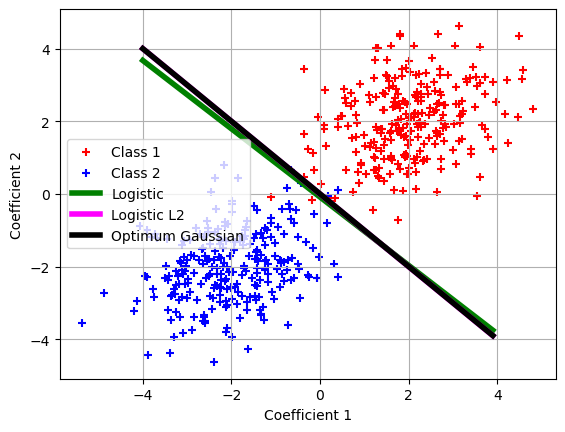

In [21]:
i1=np.where((set_up['ytrain'][:,0]==1))
i2=np.where((set_up['ytrain'][:,0]==-1))
fig, ax = plt.subplots()
ax.scatter(set_up['Xtrain'][i1,0],set_up['Xtrain'][i1,1],marker = '+',color='r',label = 'Class 1')
ax.scatter(set_up['Xtrain'][i2,0],set_up['Xtrain'][i2,1],marker = '+',color='b',label = 'Class 2')
e_cvx=test_phase_class(set_up,'g',x_cvx,ax,'Logistic')
e_L2_cvx=test_phase_class(set_up,'magenta',x_L2_cvx,ax,'Logistic L2')
e_theo=test_phase_class(set_up,'k',np.concatenate([wij,np.array([bij])]),ax,'Optimum Gaussian')
ax.set_xlabel('Coefficient 1')
ax.set_ylabel('Coefficient 2')
ax.legend()
ax.grid()
print(e_cvx,e_L2_cvx,e_theo)

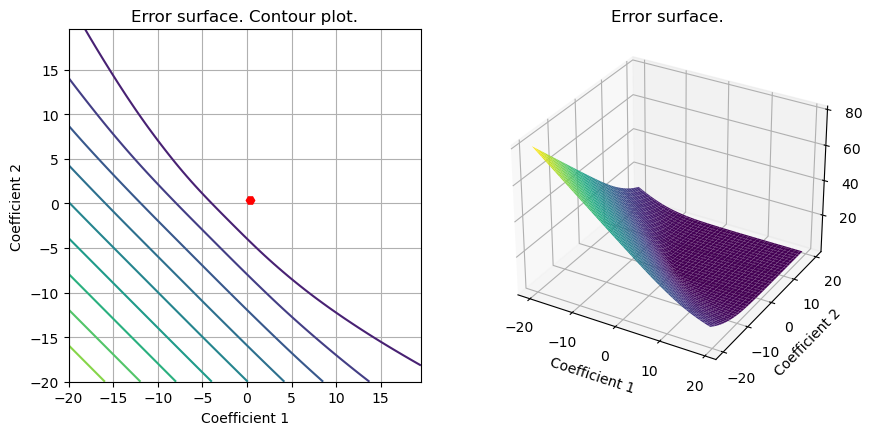

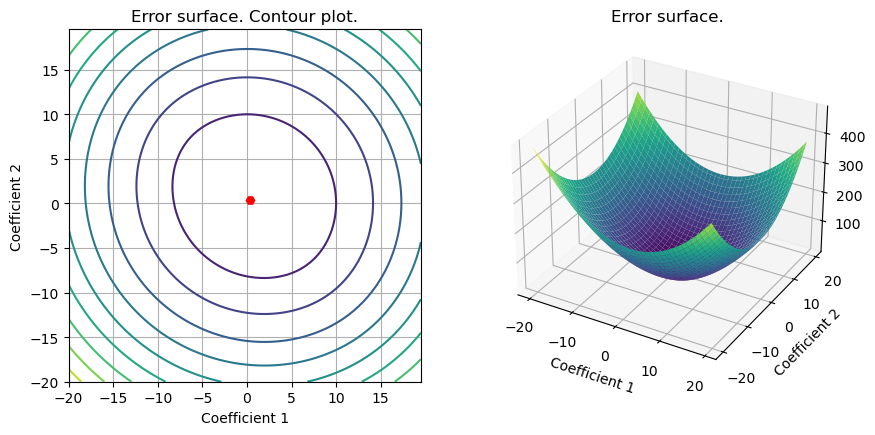

In [20]:
# We draw the surface 
S1=plot_surface(set_up,loss_LS,x_L2_cvx)
S2=plot_surface(set_up,loss_LS_L2,x_L2_cvx)